## *Elements of Machine Learning* 2023
## Alan Reyes-Figueroa

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
import seaborn as sns

from scipy import stats as st

import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Distribuciones Multivariadas

In [3]:
df = sns.load_dataset('penguins')       # importar el conjunto de datos
df.shape

(344, 7)

In [4]:
df = df.dropna()
df.shape

(333, 7)

In [5]:
df.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [6]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


<Figure size 576x576 with 0 Axes>

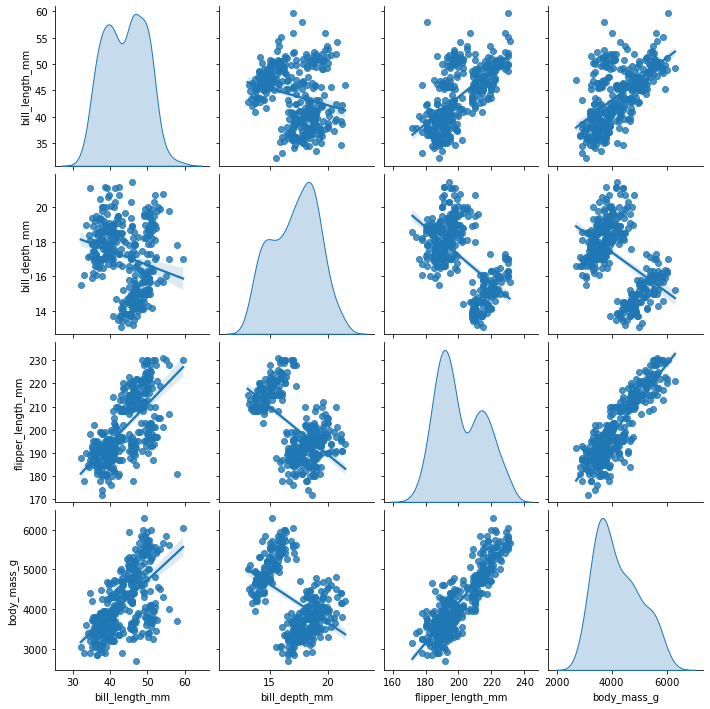

In [7]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df, diag_kind='kde', kind='reg')
plt.show()

In [8]:
df.cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,29.906333,-2.462091,50.058195,2595.623304
bill_depth_mm,-2.462091,3.877888,-15.947248,-748.456122
flipper_length_mm,50.058195,-15.947248,196.441677,9852.191649
body_mass_g,2595.623304,-748.456122,9852.191649,648372.487699


In [9]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


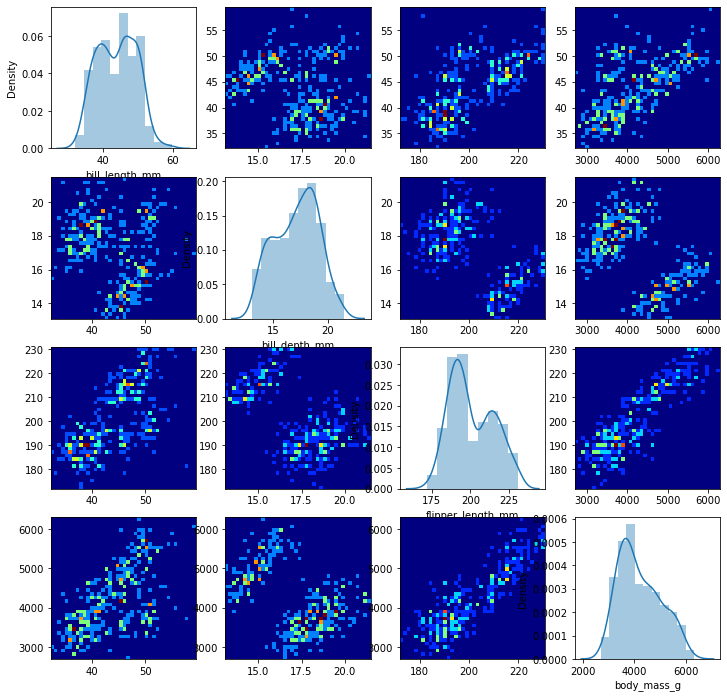

In [10]:
cols = df.columns[2:6]

plt.figure(figsize=(12,12))
for i in range(0, 4):
    for j in range(0, 4):
        plt.subplot(4, 4, 4*i+j+1)
        if (i==j):
            sns.distplot(df[cols[i]], kde=True)
        else:
            plt.hist2d(df[cols[j]], df[cols[i]], bins=(40,40), cmap=plt.cm.jet)
plt.show()

# Relación entre variables aleatorias

## Datos sintéticos

In [11]:
# parámetros
mu_x = 5.
mu_y = 5.

var_x  = 2.9
var_y  = 1.4
cov_xy = 1.8   # 1.4, -1.3

In [12]:
mu = np.array([mu_x, mu_y])
sigma = np.array([[var_x, cov_xy], [cov_xy, var_y]])

print(mu, end='\n\n')
print(sigma)

[5. 5.]

[[2.9 1.8]
 [1.8 1.4]]


In [13]:
# para verificar que sea matriz de covarianza válida
eigs = np.linalg.eig(sigma)[0]
eigs

array([4.1, 0.2])

In [14]:
if ((eigs[0] < 0) or (eigs[1] < 0)):
    print('sigma no es una matriz de covarianza válida!!!')
else:
    print('sigma Ok!')

sigma Ok!


In [15]:
# Genera datos aleatorios con media mu y covarianza sigma
N = 200
np.random.seed(2023)

sample = np.random.multivariate_normal(mu, sigma, size=N)
sample.shape

df = pd.DataFrame(data=sample, columns=['X1', 'X2'])

In [16]:
df.head(3)

,X1,X2
0,3.881486,4.079919
1,6.629318,6.213193
2,5.455236,4.690064


In [17]:
x = np.linspace(0, 10, 201)
y = np.linspace(0, 10, 201)
X, Y = np.meshgrid(x, y)

Z = (1. / (2.*np.pi*np.sqrt(np.linalg.det(sigma)))) * \
np.exp(-( (var_y*(X-mu_x)**2) + (var_x*(Y-mu_y)**2) - (2.*cov_xy*(X-mu_x)*(Y-mu_y)) ) / (2.*np.linalg.det(sigma)) )

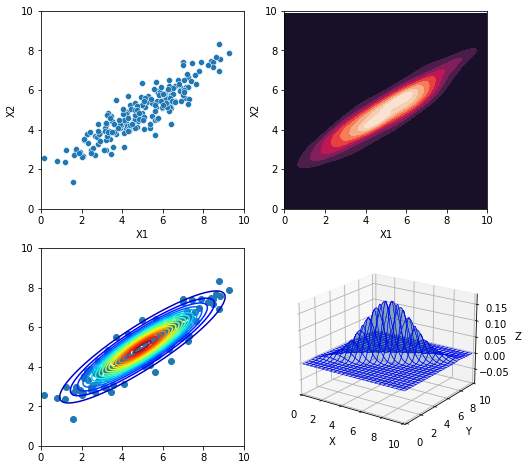

In [18]:
zmax = Z.max()
fig = plt.figure(figsize=(8,8))

ax = fig.add_subplot(2,2,1)
sns.scatterplot(data=df, x='X1', y='X2')
ax.set_xlim([0,10])
ax.set_ylim([0,10])

ax = fig.add_subplot(2,2,2)
sns.kdeplot(data=df, x='X1', y='X2', fill=True, thresh=0, levels=10, cmap='rocket')
ax.set_xlim([0,10])
ax.set_ylim([0,10])

ax = fig.add_subplot(2,2,3)
plt.scatter(sample[:,0], sample[:,1])
ax.contour(X, Y, Z, 20, cmap='jet')
ax.set_xlim([0,10])
ax.set_ylim([0,10])

ax = fig.add_subplot(2,2,4, projection='3d')
ax.plot_surface(X, Y, Z, edgecolor='Blue', lw=0.5, rstride=8, cstride=8, alpha=0.3)
#ax.contour(X, Y, Z, zdir='z', offset=-zmax/2, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='x', offset=0, cmap='coolwarm')
#ax.contour(X, Y, Z, zdir='y', offset=10, cmap='coolwarm')
ax.view_init(20, -55)
ax.set(xlim=(0, 10), ylim=(0, 10), zlim=(-zmax/2, zmax), xlabel='X', ylabel='Y', zlabel='Z')
plt.show()

## Cálculo de estadísticos

In [19]:
df.head(3)

,X1,X2
0,3.881486,4.079919
1,6.629318,6.213193
2,5.455236,4.690064


In [20]:
# datos centrados
df_centered = df.copy()
df_centered['X1'] = df['X1'] - mu_x
df_centered['X2'] = df['X2'] - mu_y

In [21]:
df_centered.head(3)

,X1,X2
0,-1.118514,-0.920081
1,1.629318,1.213193
2,0.455236,-0.309936


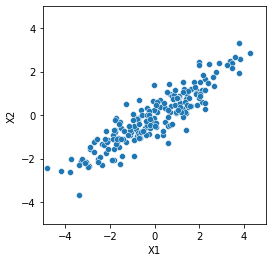

In [22]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df_centered, x='X1', y='X2')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

In [23]:
df.cov()

,X1,X2
X1,3.27009,2.05845
X2,2.05845,1.58797


In [24]:
df.X1.var()

3.2700904639318615

In [25]:
df.X2.var()

1.5879696528457299

In [26]:
((df['X1'] - mu_x)**2).mean()

3.2562642209912864

In [27]:
((df['X2'] - mu_y)**2).mean()

1.5899932135590762

In [28]:
((df['X1'] - mu_x)*(df['X2'] - mu_y)).mean()

2.05317220982982

## Entropía e Información Mutua

In [29]:
def shannon_entropy(A, mode="auto", verbose=False):
    """
    https://stackoverflow.com/questions/42683287/python-numpy-shannon-entropy-array
    """
    A = np.asarray(A)

    # Determine distribution type
    if mode == "auto":
        condition = np.all(A.astype(float) == A.astype(int))
        if condition:
            mode = "discrete"
        else:
            mode = "continuous"
    if verbose:
        print(mode, file=sys.stderr)
    # Compute shannon entropy
    pA = A / A.sum()
    # Remove zeros
    pA = pA[np.nonzero(pA)[0]]
    if mode == "continuous":
        return -np.sum(pA*np.log(A))  
    if mode == "discrete":
        return -np.sum(pA*np.log(pA))   

    
def mutual_information(x,y, mode="auto", normalized=False):
    """
    I(X, Y) = H(X) + H(Y) - H(X,Y)
    https://stackoverflow.com/questions/20491028/optimal-way-to-compute-pairwise-mutual-information-using-numpy
    """
    x = np.asarray(x)
    y = np.asarray(y)
    # Determine distribution type
    if mode == "auto":
        condition_1 = np.all(x.astype(float) == x.astype(int))
        condition_2 = np.all(y.astype(float) == y.astype(int))
        if all([condition_1, condition_2]):
            mode = "discrete"
        else:
            mode = "continuous"

    H_x = shannon_entropy(x, mode=mode)
    H_y = shannon_entropy(y, mode=mode)
    H_xy = shannon_entropy(np.concatenate([x,y]), mode=mode)

    # Mutual Information
    I_xy = H_x + H_y - H_xy
    if normalized:
        return I_xy/np.sqrt(H_x*H_y)
    else:
        return  I_xy

In [30]:
X = df.values

In [31]:
shannon_entropy(df.X1)

-1.6712777542015596

In [32]:
shannon_entropy(df.X2)

-1.6230043379856822

In [33]:
shannon_entropy(X.ravel())

-1.6472625276416848

In [34]:
mutual_information(df.X1, df.X2)

-1.6470195645455572

In [35]:
mutual_information(df.X2, df.X1)

-1.6470195645455572